In [2]:
URL1 = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
from urllib.request import urlretrieve
urlretrieve(URL1, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7fe8c3ba6cd0>)

In [4]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Fremont.csv',index_col= 'Date',parse_dates=True)

In [3]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [4]:
%matplotlib inline

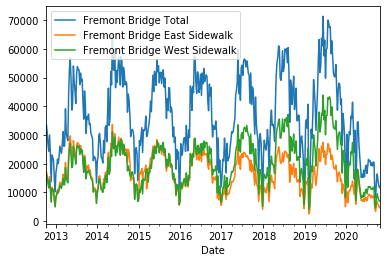

In [7]:
data.resample('W').sum().plot()

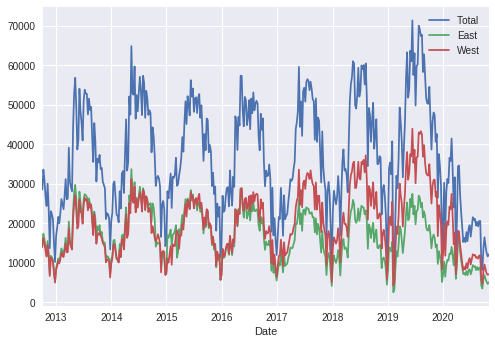

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ["Total", "East", "West"]
data.resample('W').sum().plot()

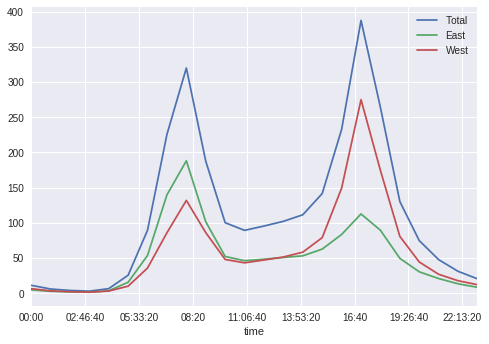

In [11]:
data.groupby(data.index.time).mean().plot()

In [17]:
pivoted = data.pivot_table("Total", index = data.index.time, columns=data.index.date)
pivoted.iloc[:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,7.0,3.0,7.0,4.0,2.0,4.0,5.0,6.0,1.0,12.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,3.0,0.0,3.0,3.0,1.0,2.0,5.0,6.0,1.0,6.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,8.0,4.0,0.0,3.0,6.0,8.0,6.0,5.0,4.0,3.0


In [19]:
pivoted.shape

(24, 2951)

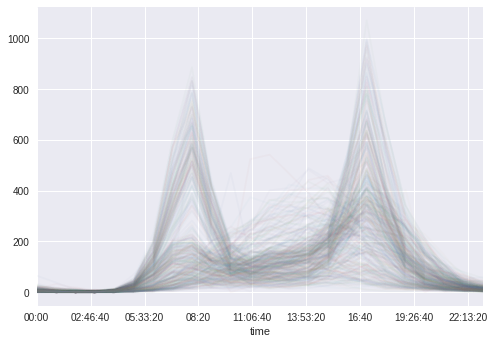

In [24]:
pivoted.iloc[:,2500:].plot(legend=False,alpha = 0.03)

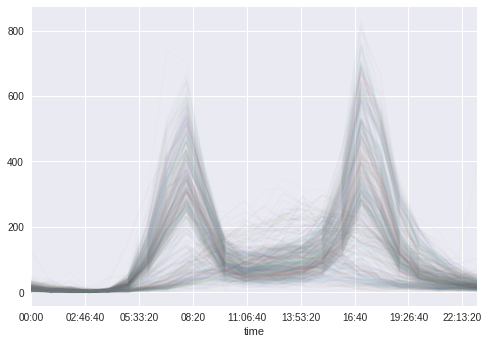

In [25]:
pivoted.iloc[:,:500].plot(legend=False,alpha = 0.03)

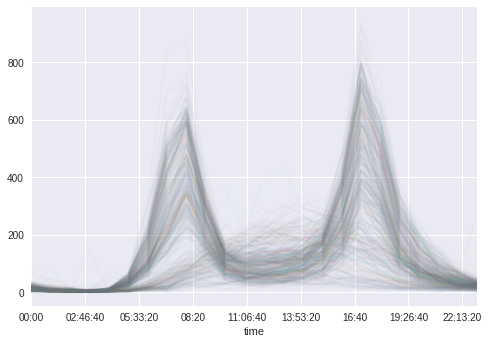

In [29]:
pivoted.iloc[:,500:1000].plot(legend=False,alpha = 0.03)

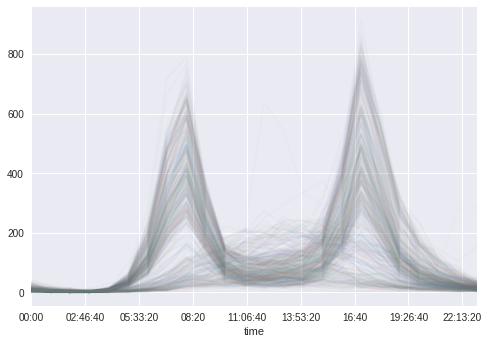

In [30]:
pivoted.iloc[:,1500:2000].plot(legend=False,alpha = 0.03)